In [1]:
%matplotlib inline
import skimage.io
import skimage.morphology
import matplotlib.pyplot as plt

import os.path
import os


import sys
sys.path.insert(0, '/home/jr0th/github/segmentation/code/')
import helper.metrics
import helper.model_builder

import numpy as np

import tensorflow as tf
import keras

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

Using TensorFlow backend.


In [2]:
dir_images = "/home/jr0th/github/segmentation/data/BBBC022_hand_200/test/x_big/"
dir_probmap = "/home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_probmap/"
dir_label = "/home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/"

weights_path = '/home/jr0th/github/segmentation/checkpoints/boundary_4_random_augment/checkpoint_0099.hdf5'

# GET PREDICTIONS

In [3]:
# build session running on GPU 1
configuration = tf.ConfigProto()
configuration.gpu_options.allow_growth = True
configuration.gpu_options.visible_device_list = "0"
session = tf.Session(config = configuration)

# apply session
keras.backend.set_session(session)

In [4]:
batch_size = 10
bit_depth = 8

imagebuffer = skimage.io.imread_collection(dir_images + '*.png')
images = imagebuffer.concatenate()

dim1 = images.shape[1]
dim2 = images.shape[2]

images = images.reshape((-1, dim1, dim2, 1))

# preprocess
images = images / 255

# # get generator for test data
# test_generator = helper.data_provider.single_data_from_images(
#     data_dir_x,
#     data_dir_y,
#     batch_size,
#     bit_depth,
#     dim1, 
#     dim2
# )

# build model and laod weights
model = helper.model_builder.get_model_1_class(dim1, dim2)
model.load_weights(weights_path)

predictions = model.predict(images, batch_size = 10)

print(predictions.shape)

/home/jr0th/github/segmentation/code/helper/model_builder.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  a = keras.layers.Convolution2D(64, 3, 3, **option_dict_conv)(x)
/home/jr0th/github/segmentation/code/helper/model_builder.py:27: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(momentum=0.9)`
  a = keras.layers.BatchNormalization(**option_dict_bn)(a)
/home/jr0th/github/segmentation/code/helper/model_builder.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  a = keras.layers.Convolution2D(64, 3, 3, **option_dict_conv)(a)
/home/jr0th/github/segmentation/code/helper/model_builder.py:33: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(momentum=0.9)`
  a = keras.layers.BatchNormalization(**option_dict_bn)(a)
/home/jr0th/github/segmentation/code/helper/mode

(50, 520, 696, 1)


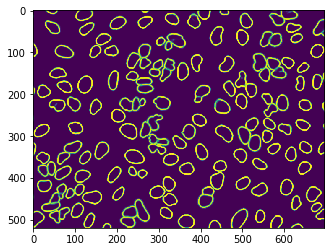

In [5]:
# print one prediction for debug purposes
plt.imshow(predictions[42].squeeze())
plt.show()

IXMtest_A02_s1_w1051DAA7C-7042-435F-99F0-1E847D9B42CB.png


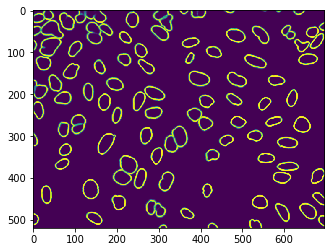

/usr/local/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


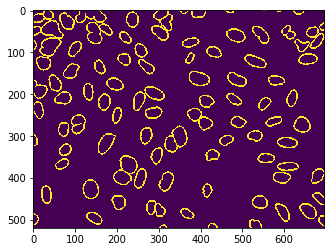

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


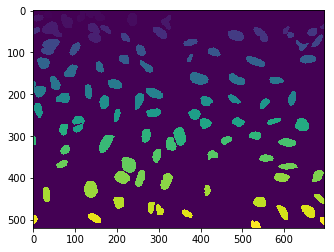

IXMtest_A06_s6_w1B9577918-4973-4A87-BA73-A168AA755527.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_A02_s1_w1051DAA7C-7042-435F-99F0-1E847D9B42CB.png is a low contrast image
  warn('%s is a low contrast image' % fname)


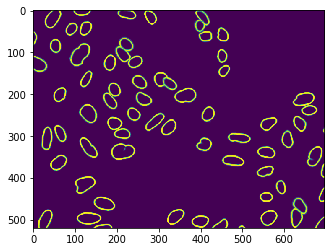

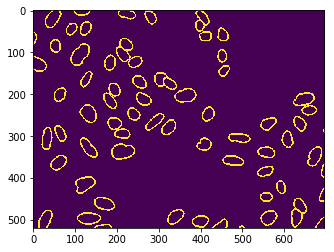

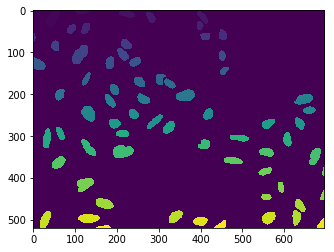

IXMtest_A09_s1_w1CE70AD49-290D-4312-82E6-CDC717F32637.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_A06_s6_w1B9577918-4973-4A87-BA73-A168AA755527.png is a low contrast image
  warn('%s is a low contrast image' % fname)


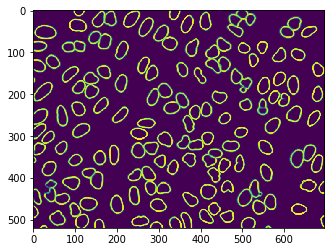

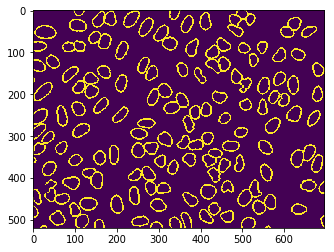

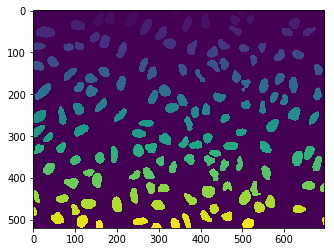

IXMtest_A12_s7_w1EAEEA614-51ED-43B3-A4FF-088730911E4C.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_A09_s1_w1CE70AD49-290D-4312-82E6-CDC717F32637.png is a low contrast image
  warn('%s is a low contrast image' % fname)


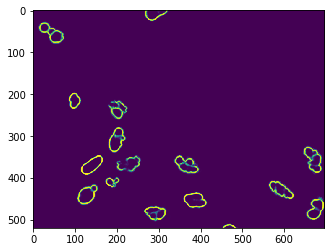

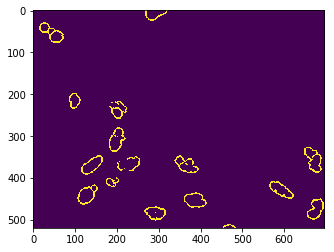

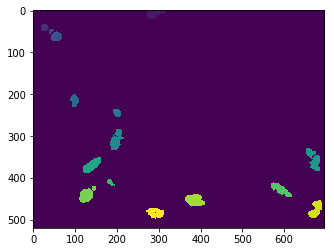

IXMtest_A15_s5_w1825174D4-ED30-490C-9635-6196417D6C9D.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_A12_s7_w1EAEEA614-51ED-43B3-A4FF-088730911E4C.png is a low contrast image
  warn('%s is a low contrast image' % fname)


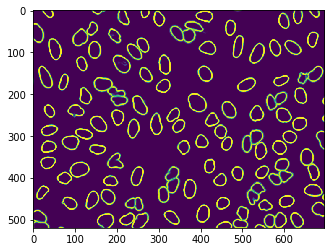

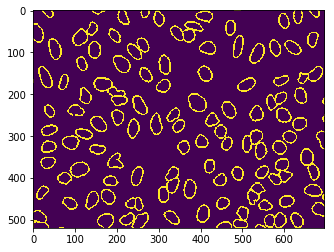

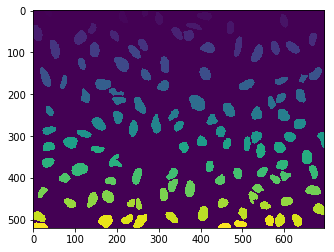

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_A15_s5_w1825174D4-ED30-490C-9635-6196417D6C9D.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_A16_s2_w15AF20A10-82AE-48FA-AC50-7AE8AC3AA544.png


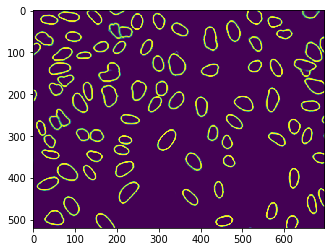

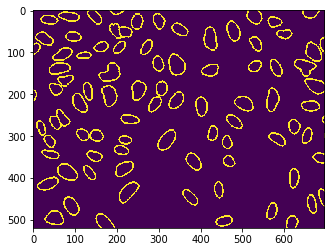

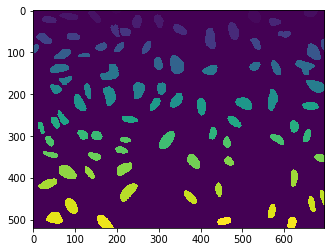

IXMtest_A16_s3_w1032BE329-E21B-4E1B-B4B8-58700685EE0C.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_A16_s2_w15AF20A10-82AE-48FA-AC50-7AE8AC3AA544.png is a low contrast image
  warn('%s is a low contrast image' % fname)


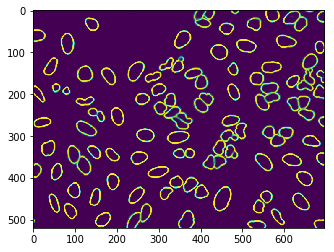

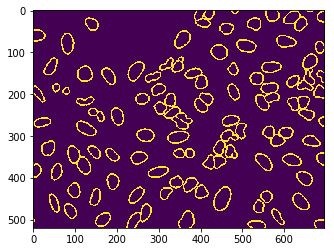

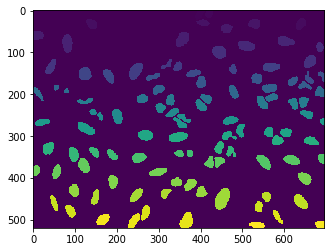

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_A16_s3_w1032BE329-E21B-4E1B-B4B8-58700685EE0C.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_A18_s1_w1BFDF1C94-9C1F-4F5F-BBC1-05196333B1BF.png


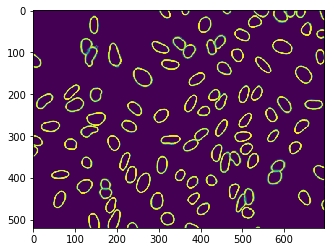

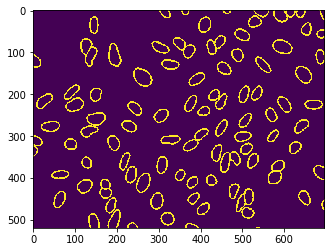

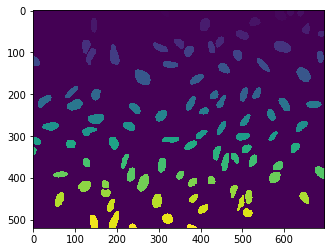

IXMtest_A20_s4_w153DE191F-B112-471B-AC0A-FAD27990714B.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_A18_s1_w1BFDF1C94-9C1F-4F5F-BBC1-05196333B1BF.png is a low contrast image
  warn('%s is a low contrast image' % fname)


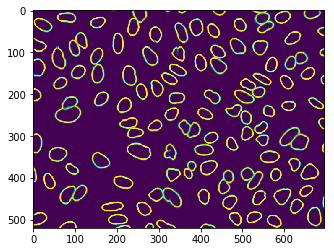

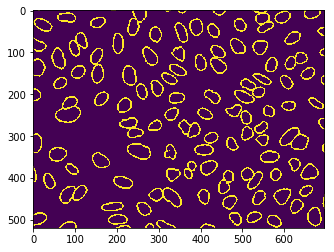

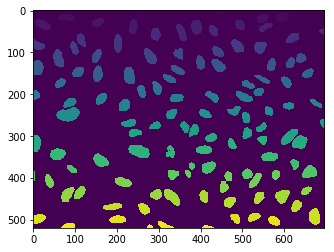

IXMtest_A21_s1_w1D8BF2790-C628-4109-94AF-DF6D8A3480B6.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_A20_s4_w153DE191F-B112-471B-AC0A-FAD27990714B.png is a low contrast image
  warn('%s is a low contrast image' % fname)


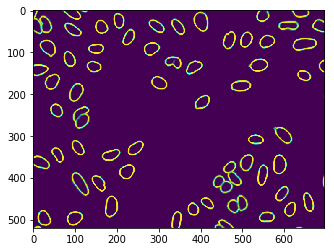

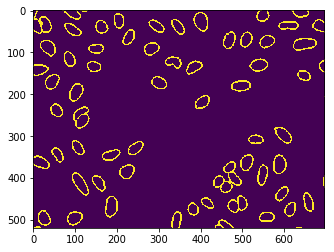

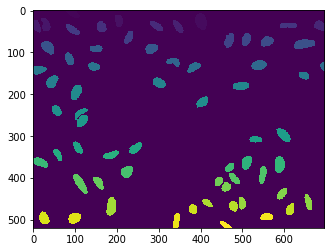

IXMtest_A22_s8_w1E2AFE190-831D-4D9C-961E-3AA2ECB3599D.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_A21_s1_w1D8BF2790-C628-4109-94AF-DF6D8A3480B6.png is a low contrast image
  warn('%s is a low contrast image' % fname)


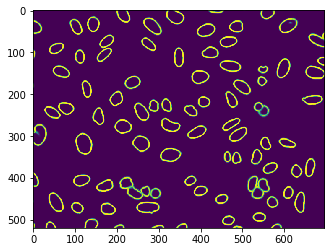

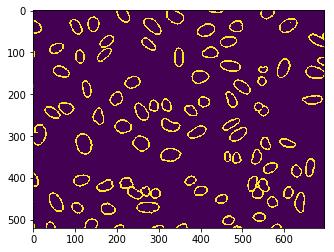

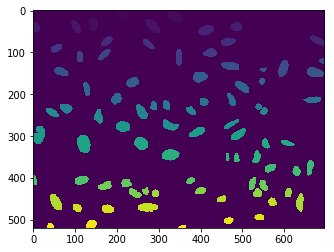

IXMtest_A24_s9_w152CD6793-DA45-4975-869A-CBD49D645E37.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_A22_s8_w1E2AFE190-831D-4D9C-961E-3AA2ECB3599D.png is a low contrast image
  warn('%s is a low contrast image' % fname)


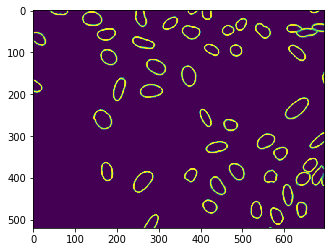

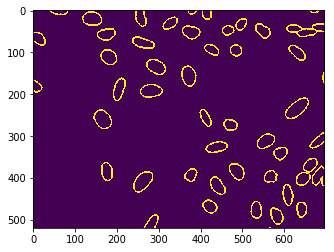

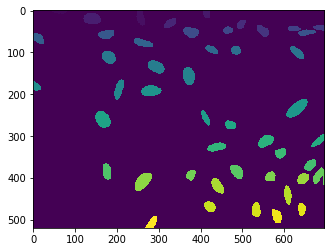

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_A24_s9_w152CD6793-DA45-4975-869A-CBD49D645E37.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_B02_s9_w124B5080D-EBE1-47D2-B147-C0F342039EDF.png


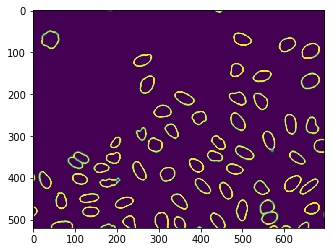

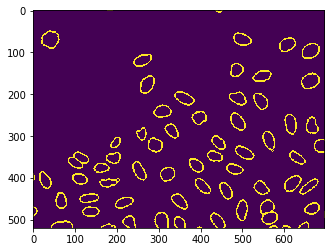

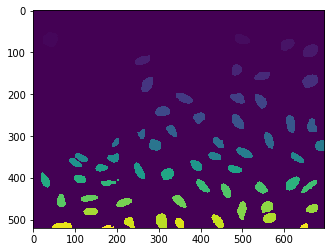

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_B02_s9_w124B5080D-EBE1-47D2-B147-C0F342039EDF.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_B04_s2_w17C6C7F8D-98F7-422B-92CD-EA61EE813325.png


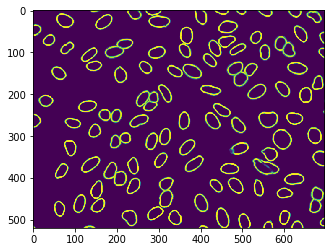

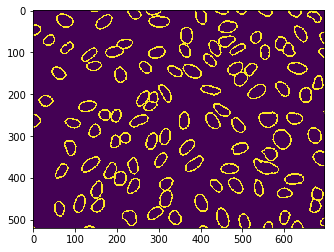

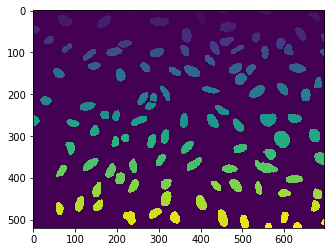

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_B04_s2_w17C6C7F8D-98F7-422B-92CD-EA61EE813325.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_B04_s4_w1F6AEFA0F-AF87-4B3B-A334-698647CFE043.png


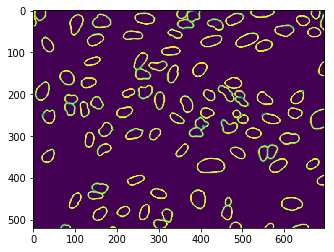

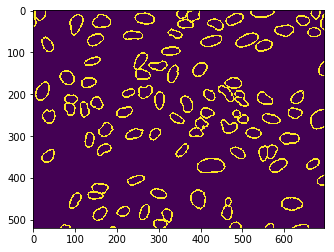

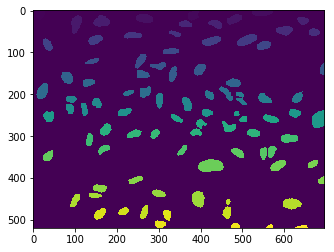

IXMtest_B05_s5_w10296BEF4-0F48-4EC8-BC24-6C604871398B.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_B04_s4_w1F6AEFA0F-AF87-4B3B-A334-698647CFE043.png is a low contrast image
  warn('%s is a low contrast image' % fname)


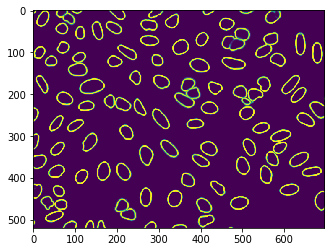

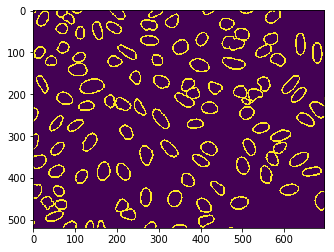

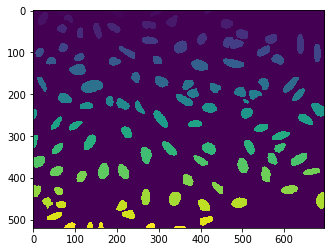

IXMtest_B12_s2_w19F7E0279-D087-4B5E-9899-61971C29CB78.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_B05_s5_w10296BEF4-0F48-4EC8-BC24-6C604871398B.png is a low contrast image
  warn('%s is a low contrast image' % fname)


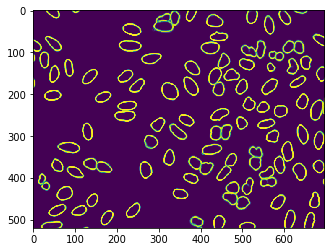

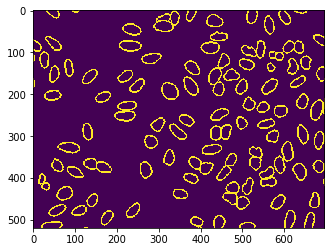

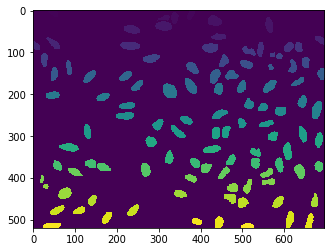

IXMtest_B12_s9_w1ABE4C6B8-6110-4D7D-B782-94C43FDC2E1F.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_B12_s2_w19F7E0279-D087-4B5E-9899-61971C29CB78.png is a low contrast image
  warn('%s is a low contrast image' % fname)


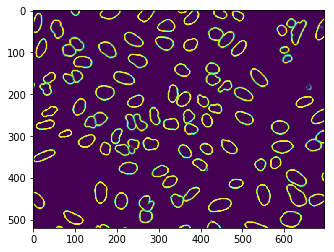

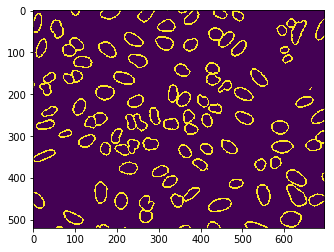

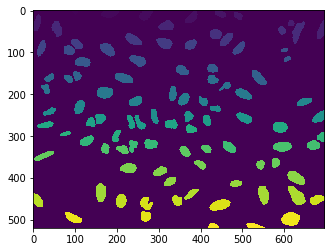

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_B12_s9_w1ABE4C6B8-6110-4D7D-B782-94C43FDC2E1F.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_B17_s7_w1215A0A98-4A76-4846-B54A-F7C1EAF84E02.png


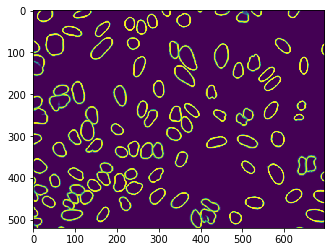

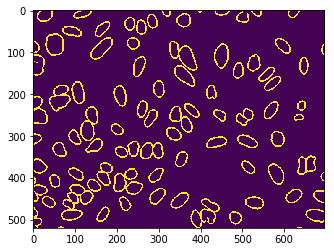

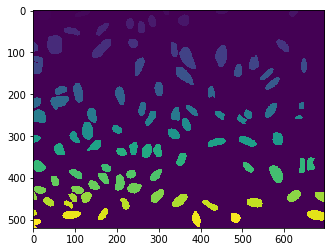

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_B17_s7_w1215A0A98-4A76-4846-B54A-F7C1EAF84E02.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_B19_s7_w1E43B84DB-39E2-4BFB-8CB4-554B32098C75.png


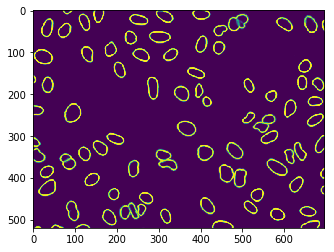

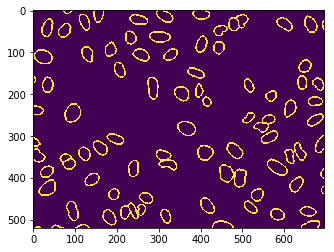

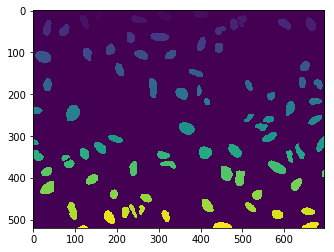

IXMtest_B20_s2_w159B9FE71-035A-4DED-B0CA-C76916C968BC.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_B19_s7_w1E43B84DB-39E2-4BFB-8CB4-554B32098C75.png is a low contrast image
  warn('%s is a low contrast image' % fname)


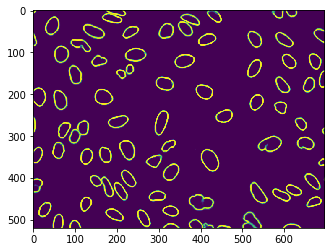

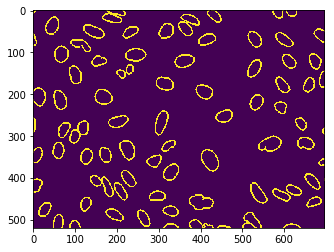

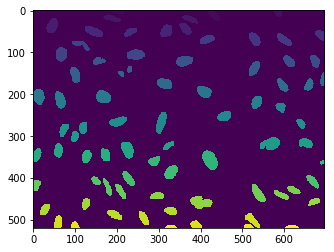

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_B20_s2_w159B9FE71-035A-4DED-B0CA-C76916C968BC.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_B21_s3_w141E785B1-44FE-4ED0-9CCE-6FF076EFE9FE.png


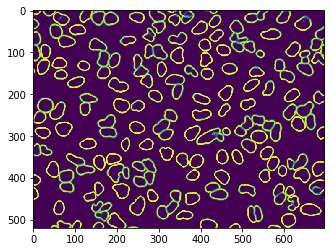

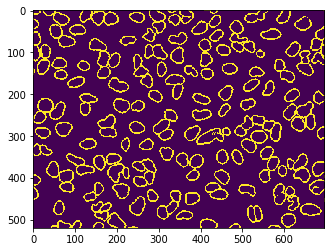

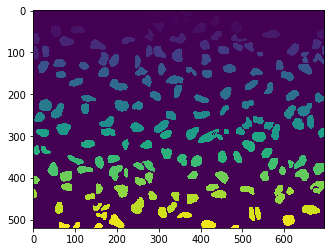

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_B21_s3_w141E785B1-44FE-4ED0-9CCE-6FF076EFE9FE.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_B21_s4_w1521471E0-9BD7-492A-8739-9C782C2585B0.png


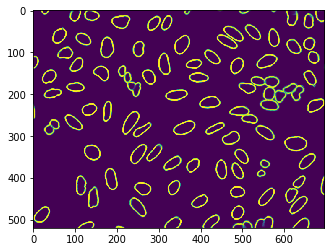

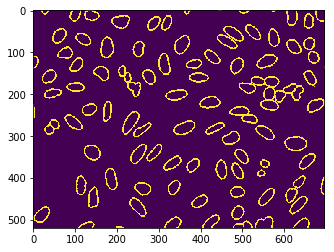

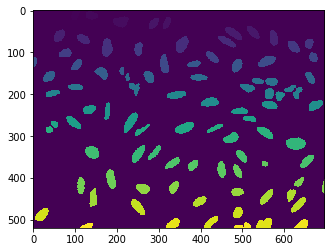

IXMtest_B21_s7_w1276972A2-1794-4A98-8E76-876A597C346B.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_B21_s4_w1521471E0-9BD7-492A-8739-9C782C2585B0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


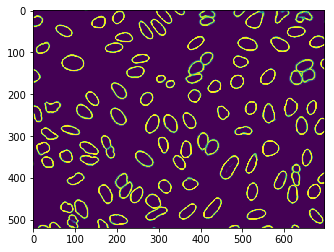

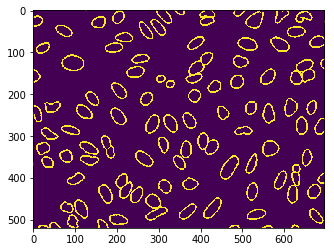

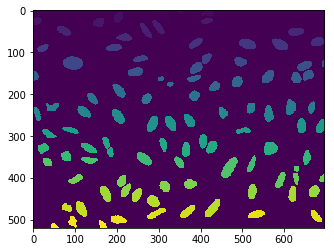

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_B21_s7_w1276972A2-1794-4A98-8E76-876A597C346B.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_B22_s6_w19397283D-2426-4942-8A0F-EB75E1D48C2D.png


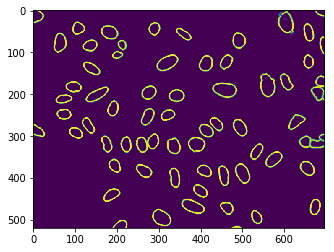

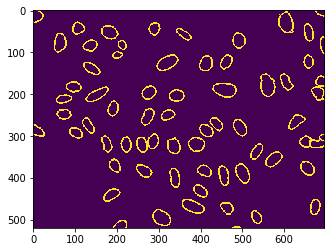

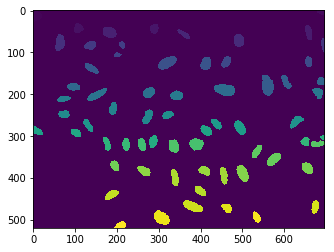

IXMtest_B22_s8_w10754C18F-B059-47B4-A423-FF429B984D80.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_B22_s6_w19397283D-2426-4942-8A0F-EB75E1D48C2D.png is a low contrast image
  warn('%s is a low contrast image' % fname)


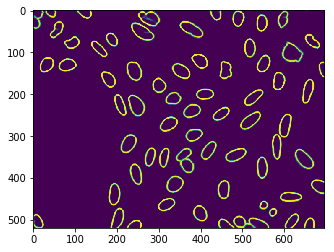

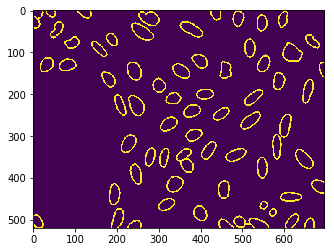

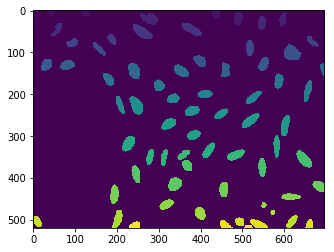

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_B22_s8_w10754C18F-B059-47B4-A423-FF429B984D80.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_B23_s1_w152C21D3B-75A9-4FF9-839A-23E6CE19AEEC.png


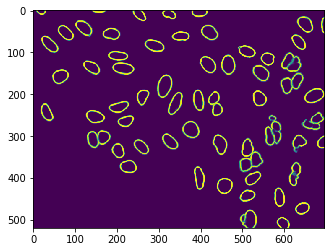

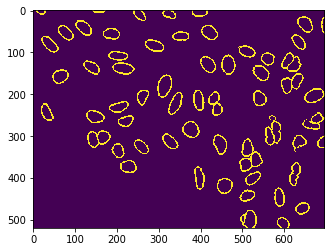

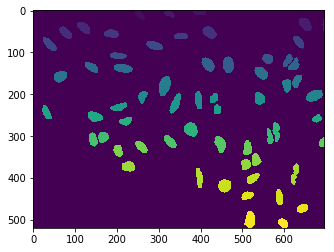

IXMtest_B24_s9_w18C4FE0DD-12CA-4711-9722-3E3105D1E691.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_B23_s1_w152C21D3B-75A9-4FF9-839A-23E6CE19AEEC.png is a low contrast image
  warn('%s is a low contrast image' % fname)


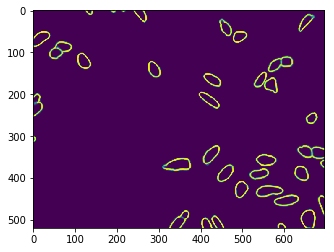

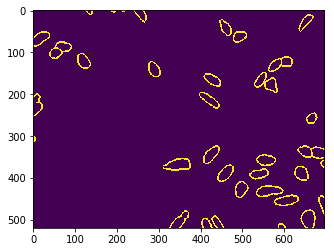

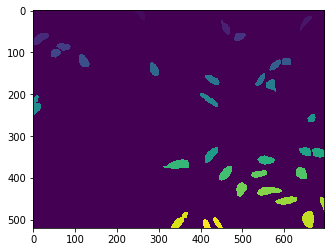

IXMtest_C02_s4_w1661FF37C-AB9B-4038-BDF3-D21DFD2811BE.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_B24_s9_w18C4FE0DD-12CA-4711-9722-3E3105D1E691.png is a low contrast image
  warn('%s is a low contrast image' % fname)


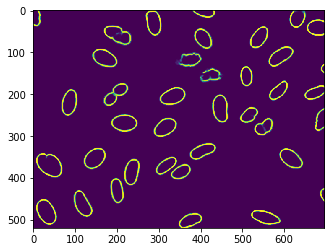

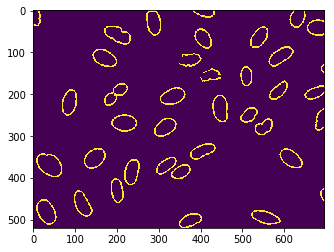

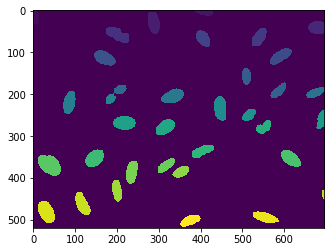

IXMtest_C05_s7_w1F71963FB-8F29-41CB-A5F5-07CB9584BBC5.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_C02_s4_w1661FF37C-AB9B-4038-BDF3-D21DFD2811BE.png is a low contrast image
  warn('%s is a low contrast image' % fname)


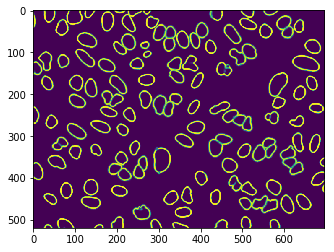

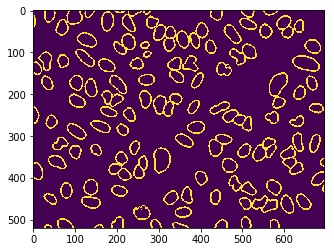

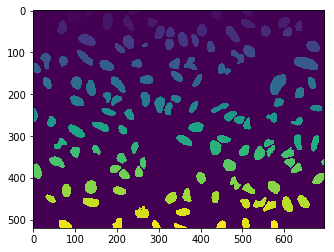

IXMtest_C07_s5_w12C9F2926-A017-4962-8660-72C9C20C86E4.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_C05_s7_w1F71963FB-8F29-41CB-A5F5-07CB9584BBC5.png is a low contrast image
  warn('%s is a low contrast image' % fname)


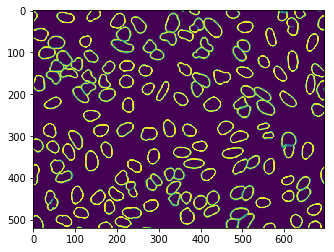

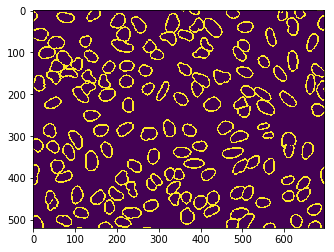

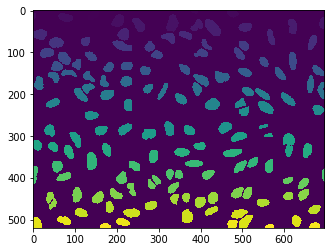

IXMtest_C09_s7_w1768A3B0D-47FE-4D77-B1C6-46018E29486F.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_C07_s5_w12C9F2926-A017-4962-8660-72C9C20C86E4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


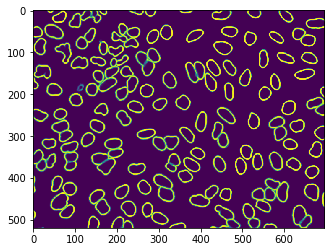

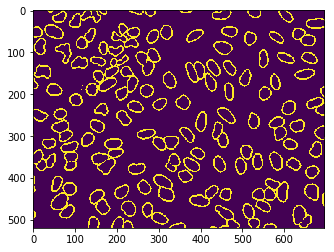

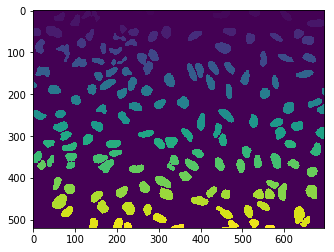

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_C09_s7_w1768A3B0D-47FE-4D77-B1C6-46018E29486F.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_C14_s8_w1612E3D43-FA7E-4FFB-BE53-F34A3A0CAFCD.png


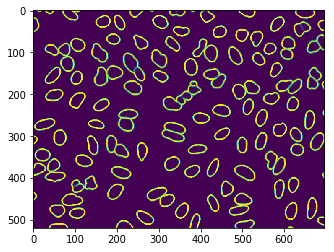

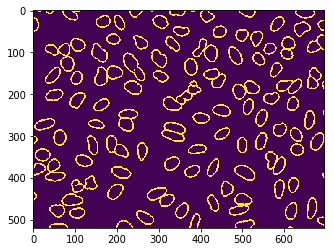

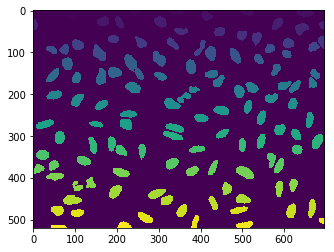

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_C14_s8_w1612E3D43-FA7E-4FFB-BE53-F34A3A0CAFCD.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_C18_s1_w11C16FC59-2E29-496A-803A-89581FDF538A.png


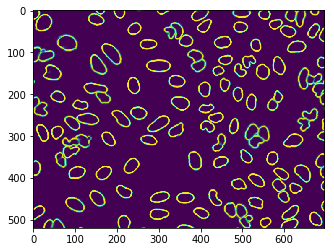

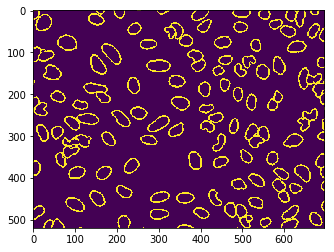

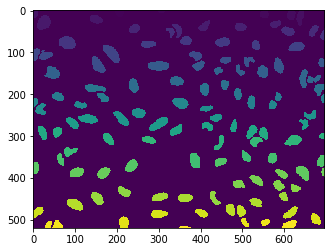

IXMtest_C19_s4_w1AD3DC23E-B9B5-46E9-9716-26096C672A13.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_C18_s1_w11C16FC59-2E29-496A-803A-89581FDF538A.png is a low contrast image
  warn('%s is a low contrast image' % fname)


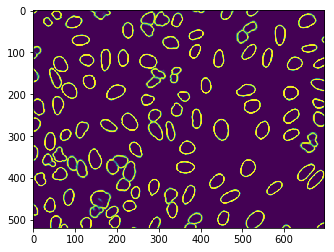

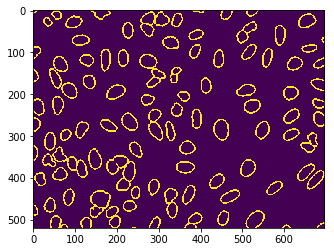

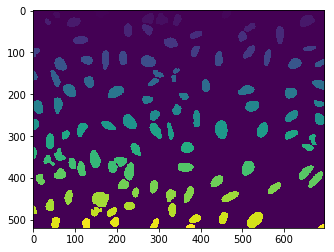

IXMtest_C21_s9_w1289444BE-8623-4867-86E7-01E155C6538D.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_C19_s4_w1AD3DC23E-B9B5-46E9-9716-26096C672A13.png is a low contrast image
  warn('%s is a low contrast image' % fname)


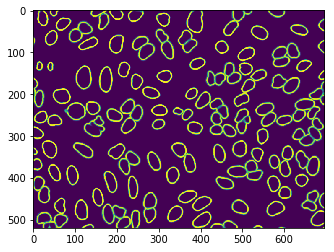

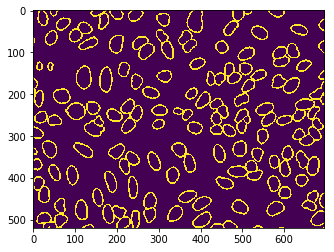

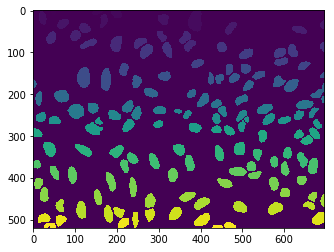

IXMtest_C23_s2_w10533E965-3DC3-4556-9C26-EA8DD4F8DE61.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_C21_s9_w1289444BE-8623-4867-86E7-01E155C6538D.png is a low contrast image
  warn('%s is a low contrast image' % fname)


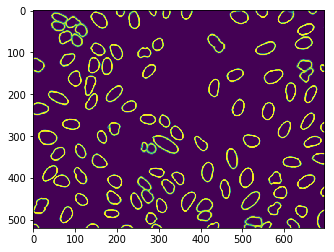

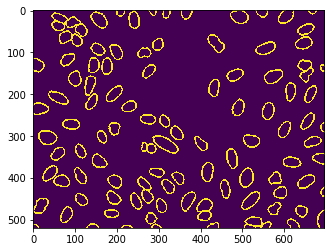

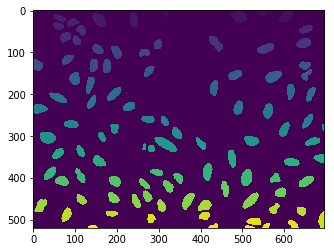

IXMtest_D01_s1_w181AE787C-B5EE-4150-A90E-2FE43165C32E.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_C23_s2_w10533E965-3DC3-4556-9C26-EA8DD4F8DE61.png is a low contrast image
  warn('%s is a low contrast image' % fname)


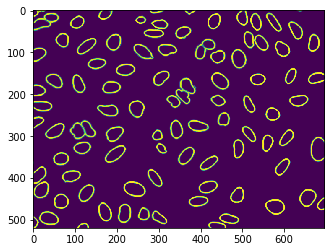

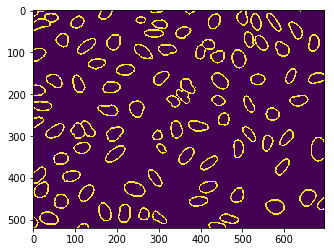

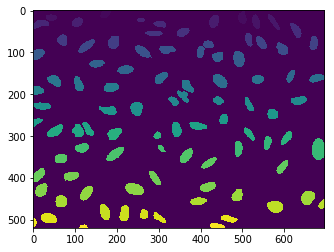

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_D01_s1_w181AE787C-B5EE-4150-A90E-2FE43165C32E.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_D02_s8_w1AC6783DF-ED35-4818-8091-E6D02AF4BFBD.png


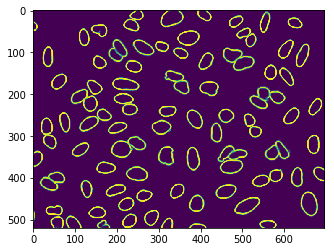

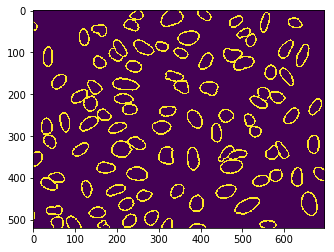

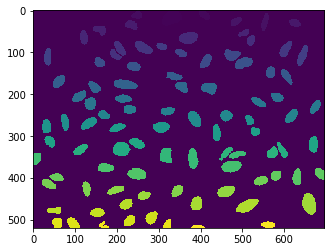

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_D02_s8_w1AC6783DF-ED35-4818-8091-E6D02AF4BFBD.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_D04_s2_w1E05C134E-BAFE-4FD7-8116-2D05E0839879.png


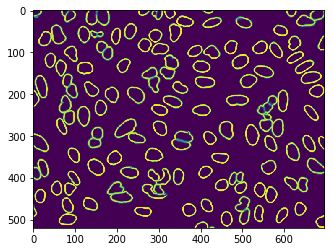

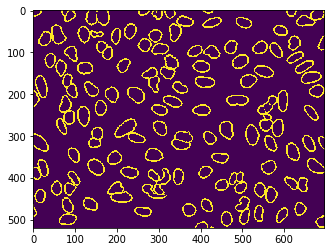

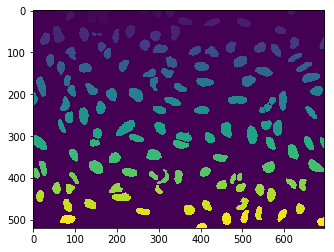

IXMtest_D04_s9_w17B6268DB-8215-4DC6-943C-CC009A8A5732.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_D04_s2_w1E05C134E-BAFE-4FD7-8116-2D05E0839879.png is a low contrast image
  warn('%s is a low contrast image' % fname)


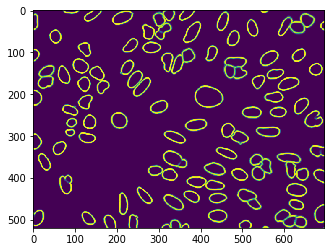

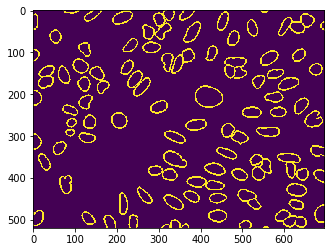

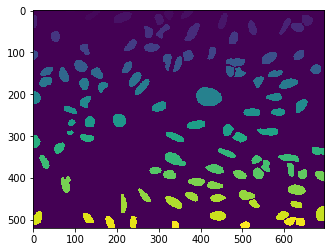

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_D04_s9_w17B6268DB-8215-4DC6-943C-CC009A8A5732.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_D06_s5_w13C67AAA9-6E81-42DB-AC5F-7126602F3607.png


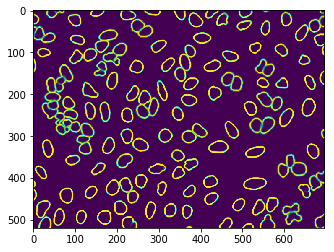

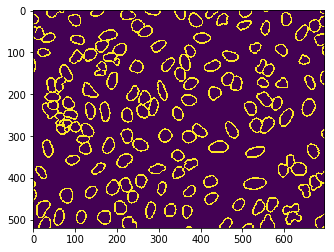

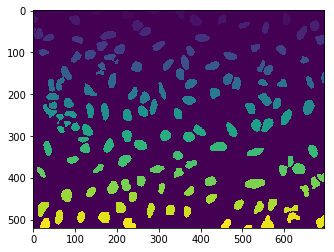

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_D06_s5_w13C67AAA9-6E81-42DB-AC5F-7126602F3607.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_D06_s8_w1BE84C8EF-4CD0-4B56-8267-4E662F57AC25.png


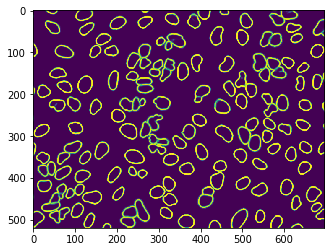

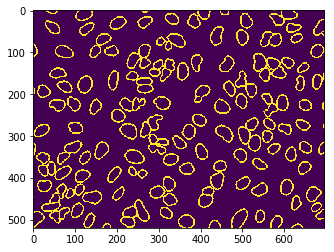

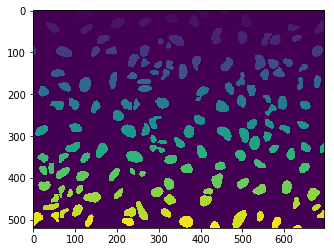

IXMtest_D07_s4_w16CF58D03-0B05-41FE-AE73-7298887DEBB1.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_D06_s8_w1BE84C8EF-4CD0-4B56-8267-4E662F57AC25.png is a low contrast image
  warn('%s is a low contrast image' % fname)


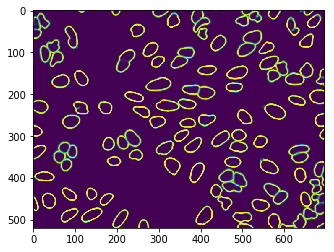

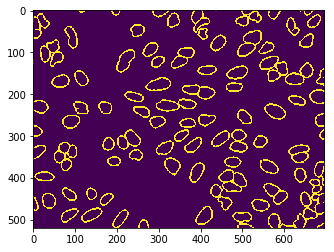

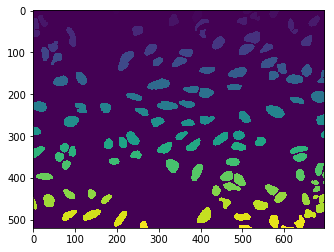

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_D07_s4_w16CF58D03-0B05-41FE-AE73-7298887DEBB1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_D08_s7_w1F476A544-A07C-4E9B-A6CB-BAEF4CD6F64E.png


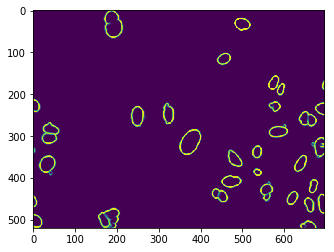

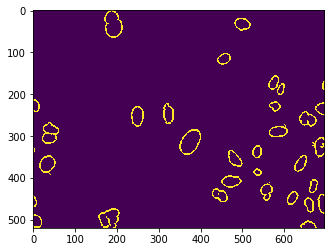

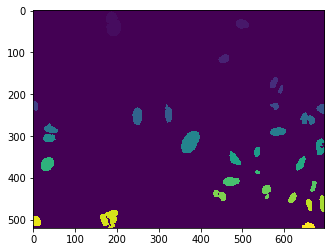

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_D08_s7_w1F476A544-A07C-4E9B-A6CB-BAEF4CD6F64E.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_D10_s2_w1BB72A093-72AB-476C-9513-2FF43BFB2134.png


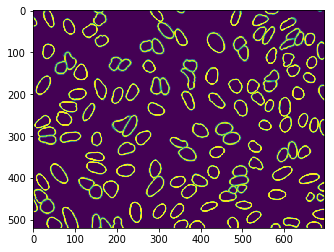

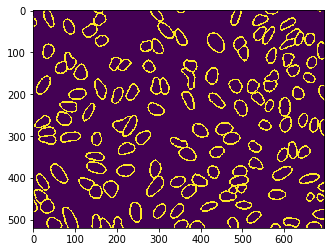

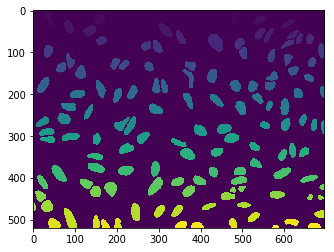

IXMtest_D19_s6_w1EB1F11AE-4FB6-481F-94D9-40246870F0CB.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_D10_s2_w1BB72A093-72AB-476C-9513-2FF43BFB2134.png is a low contrast image
  warn('%s is a low contrast image' % fname)


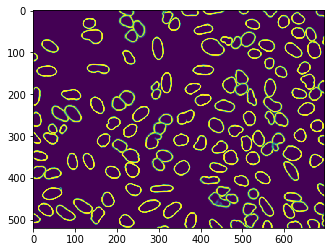

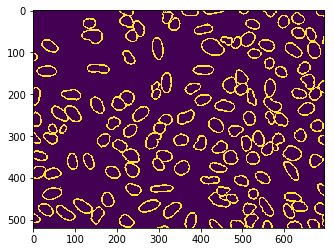

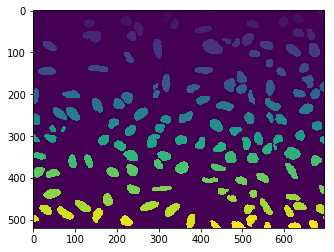

IXMtest_D20_s3_w19D371AF3-0189-48A3-AF3B-D108DE6A017F.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_D19_s6_w1EB1F11AE-4FB6-481F-94D9-40246870F0CB.png is a low contrast image
  warn('%s is a low contrast image' % fname)


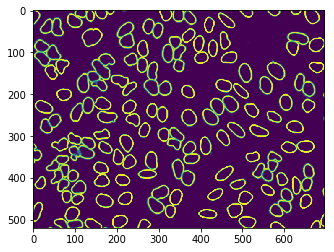

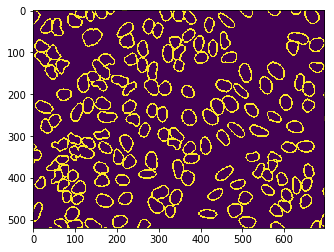

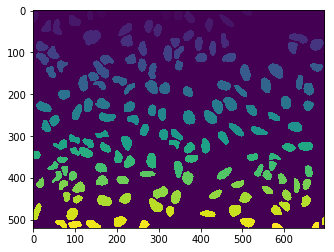

IXMtest_D20_s9_w1588B4C42-5A0D-4B93-9A80-A6527CC1C411.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_D20_s3_w19D371AF3-0189-48A3-AF3B-D108DE6A017F.png is a low contrast image
  warn('%s is a low contrast image' % fname)


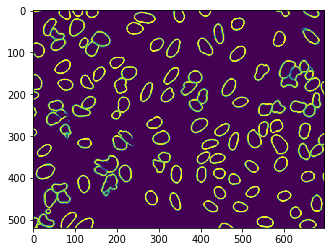

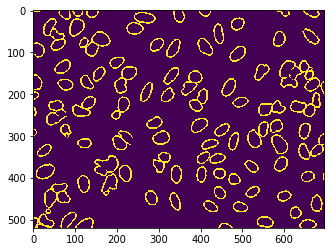

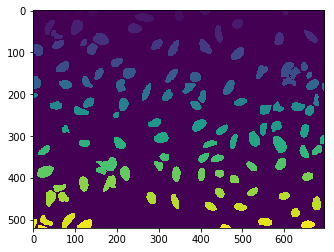

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_D20_s9_w1588B4C42-5A0D-4B93-9A80-A6527CC1C411.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_E04_s4_w1F5ABC12B-FABD-4E33-AB99-82271209853E.png


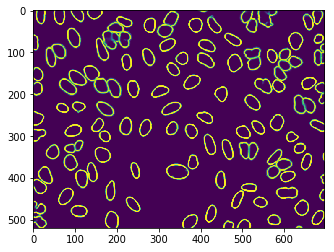

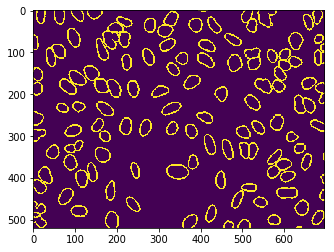

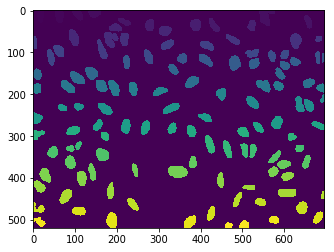

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/IXMtest_E04_s4_w1F5ABC12B-FABD-4E33-AB99-82271209853E.png is a low contrast image
  warn('%s is a low contrast image' % fname)


In [8]:
for i in range(len(images)):

    filename = imagebuffer.files[i]
    filename = os.path.basename(filename)
    print(filename)
    
    probmap = predictions[i].squeeze()
    
    plt.imshow(probmap)
    plt.show()
    
    skimage.io.imsave(dir_probmap + filename, probmap)
    
    contour = helper.metrics.probmap_to_contour(probmap)
    
    plt.imshow(contour)
    plt.show()
    
    label = helper.metrics.contour_to_label(contour, images[i])
    
    plt.imshow(label)
    plt.show()
    
    skimage.io.imsave(dir_label + filename, label)